In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
data_files = {
    'AEP': './Data/AEP_hourly.csv',
    'COMED': './Data/COMED_hourly.csv',
    'DAYTON': './Data/DAYTON_hourly.csv',
    'DEOK': './Data/DEOK_hourly.csv',
    'DOM': './Data/DOM_hourly.csv',
    'DUQ': './Data/DUQ_hourly.csv',
    'EKPC': './Data/EKPC_hourly.csv',
    'FE': './Data/FE_hourly.csv',
    'NI': './Data/NI_hourly.csv',
    'PJME': './Data/PJME_hourly.csv',
    'PJMW': './Data/PJMW_hourly.csv',
    'pjm_est': './Data/pjm_hourly_est.csv',
    'PJM_Load': './Data/PJM_Load_hourly.csv'
}

# 📊 AEP Dataset Analysis

In [7]:
# AEP Dataset Analysis
name = 'AEP'
filepath = data_files['AEP']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

# Load data
df_aep = pd.read_csv(filepath)

# 1. Basic Info
print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_aep.shape[0]:,} rows × {df_aep.shape[1]} columns")
print(f"   Columns: {list(df_aep.columns)}")
print(f"\n   Data Types:")
print(df_aep.dtypes)

# 2. Missing Values
print(f"\n❌ MISSING VALUES for {name}:")
missing = df_aep.isnull().sum()
missing_pct = (df_aep.isnull().sum() / len(df_aep)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

# 3. Descriptive Statistics
print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_aep.describe())

# 4. Date Range
if 'Datetime' in df_aep.columns:
    df_aep['Datetime'] = pd.to_datetime(df_aep['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_aep['Datetime'].min()}")
    print(f"   End: {df_aep['Datetime'].max()}")
    print(f"   Duration: {(df_aep['Datetime'].max() - df_aep['Datetime'].min()).days} days")

print("\n")


📊 DATASET: AEP

🔍 BASIC INFO for AEP:
   Shape: 121,273 rows × 2 columns
   Columns: ['Datetime', 'AEP_MW']

   Data Types:
Datetime     object
AEP_MW      float64
dtype: object

❌ MISSING VALUES for AEP:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for AEP:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000

📅 DATE RANGE for AEP:
   Start: 2004-10-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 5053 days




# 📊 COMED Dataset Analysis

In [8]:
# COMED Dataset Analysis
name = 'COMED'
filepath = data_files['COMED']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

# Load data
df_comed = pd.read_csv(filepath)

# 1. Basic Info
print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_comed.shape[0]:,} rows × {df_comed.shape[1]} columns")
print(f"   Columns: {list(df_comed.columns)}")
print(f"\n   Data Types:")
print(df_comed.dtypes)

# 2. Missing Values
print(f"\n❌ MISSING VALUES for {name}:")
missing = df_comed.isnull().sum()
missing_pct = (df_comed.isnull().sum() / len(df_comed)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

# 3. Descriptive Statistics
print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_comed.describe())

# 4. Date Range
if 'Datetime' in df_comed.columns:
    df_comed['Datetime'] = pd.to_datetime(df_comed['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_comed['Datetime'].min()}")
    print(f"   End: {df_comed['Datetime'].max()}")
    print(f"   Duration: {(df_comed['Datetime'].max() - df_comed['Datetime'].min()).days} days")

print("\n")


📊 DATASET: COMED

🔍 BASIC INFO for COMED:
   Shape: 66,497 rows × 2 columns
   Columns: ['Datetime', 'COMED_MW']

   Data Types:
Datetime     object
COMED_MW    float64
dtype: object

❌ MISSING VALUES for COMED:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for COMED:
           COMED_MW
count  66497.000000
mean   11420.152112
std     2304.139517
min     7237.000000
25%     9780.000000
50%    11152.000000
75%    12510.000000
max    23753.000000

📅 DATE RANGE for COMED:
   Start: 2011-01-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 2770 days




# 📊 DAYTON Dataset Analysis

In [9]:
# DAYTON Dataset Analysis
name = 'DAYTON'
filepath = data_files['DAYTON']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_dayton = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_dayton.shape[0]:,} rows × {df_dayton.shape[1]} columns")
print(f"   Columns: {list(df_dayton.columns)}")
print(f"\n   Data Types:")
print(df_dayton.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_dayton.isnull().sum()
missing_pct = (df_dayton.isnull().sum() / len(df_dayton)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_dayton.describe())

if 'Datetime' in df_dayton.columns:
    df_dayton['Datetime'] = pd.to_datetime(df_dayton['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_dayton['Datetime'].min()}")
    print(f"   End: {df_dayton['Datetime'].max()}")
    print(f"   Duration: {(df_dayton['Datetime'].max() - df_dayton['Datetime'].min()).days} days")
print("\n")


📊 DATASET: DAYTON

🔍 BASIC INFO for DAYTON:
   Shape: 121,275 rows × 2 columns
   Columns: ['Datetime', 'DAYTON_MW']

   Data Types:
Datetime      object
DAYTON_MW    float64
dtype: object

❌ MISSING VALUES for DAYTON:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for DAYTON:
           DAYTON_MW
count  121275.000000
mean     2037.851140
std       393.403153
min       982.000000
25%      1749.000000
50%      2009.000000
75%      2279.000000
max      3746.000000

📅 DATE RANGE for DAYTON:
   Start: 2004-10-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 5053 days




# 📊 DEOK Dataset Analysis

In [10]:
# DEOK Dataset Analysis
name = 'DEOK'
filepath = data_files['DEOK']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_deok = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_deok.shape[0]:,} rows × {df_deok.shape[1]} columns")
print(f"   Columns: {list(df_deok.columns)}")
print(f"\n   Data Types:")
print(df_deok.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_deok.isnull().sum()
missing_pct = (df_deok.isnull().sum() / len(df_deok)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_deok.describe())

if 'Datetime' in df_deok.columns:
    df_deok['Datetime'] = pd.to_datetime(df_deok['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_deok['Datetime'].min()}")
    print(f"   End: {df_deok['Datetime'].max()}")
    print(f"   Duration: {(df_deok['Datetime'].max() - df_deok['Datetime'].min()).days} days")
print("\n")


📊 DATASET: DEOK

🔍 BASIC INFO for DEOK:
   Shape: 57,739 rows × 2 columns
   Columns: ['Datetime', 'DEOK_MW']

   Data Types:
Datetime     object
DEOK_MW     float64
dtype: object

❌ MISSING VALUES for DEOK:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for DEOK:
            DEOK_MW
count  57739.000000
mean    3105.096486
std      599.859026
min      907.000000
25%     2687.000000
50%     3013.000000
75%     3449.000000
max     5445.000000

📅 DATE RANGE for DEOK:
   Start: 2012-01-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 2405 days




# 📊 DOM Dataset Analysis

In [11]:
# DOM Dataset Analysis
name = 'DOM'
filepath = data_files['DOM']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_dom = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_dom.shape[0]:,} rows × {df_dom.shape[1]} columns")
print(f"   Columns: {list(df_dom.columns)}")
print(f"\n   Data Types:")
print(df_dom.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_dom.isnull().sum()
missing_pct = (df_dom.isnull().sum() / len(df_dom)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_dom.describe())

if 'Datetime' in df_dom.columns:
    df_dom['Datetime'] = pd.to_datetime(df_dom['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_dom['Datetime'].min()}")
    print(f"   End: {df_dom['Datetime'].max()}")
    print(f"   Duration: {(df_dom['Datetime'].max() - df_dom['Datetime'].min()).days} days")
print("\n")


📊 DATASET: DOM

🔍 BASIC INFO for DOM:
   Shape: 116,189 rows × 2 columns
   Columns: ['Datetime', 'DOM_MW']

   Data Types:
Datetime     object
DOM_MW      float64
dtype: object

❌ MISSING VALUES for DOM:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for DOM:
              DOM_MW
count  116189.000000
mean    10949.203625
std      2413.946569
min      1253.000000
25%      9322.000000
50%     10501.000000
75%     12378.000000
max     21651.000000

📅 DATE RANGE for DOM:
   Start: 2005-05-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 4841 days




# 📊 DUQ Dataset Analysis

In [12]:
# DUQ Dataset Analysis
name = 'DUQ'
filepath = data_files['DUQ']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_duq = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_duq.shape[0]:,} rows × {df_duq.shape[1]} columns")
print(f"   Columns: {list(df_duq.columns)}")
print(f"\n   Data Types:")
print(df_duq.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_duq.isnull().sum()
missing_pct = (df_duq.isnull().sum() / len(df_duq)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_duq.describe())

if 'Datetime' in df_duq.columns:
    df_duq['Datetime'] = pd.to_datetime(df_duq['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_duq['Datetime'].min()}")
    print(f"   End: {df_duq['Datetime'].max()}")
    print(f"   Duration: {(df_duq['Datetime'].max() - df_duq['Datetime'].min()).days} days")
print("\n")


📊 DATASET: DUQ

🔍 BASIC INFO for DUQ:
   Shape: 119,068 rows × 2 columns
   Columns: ['Datetime', 'DUQ_MW']

   Data Types:
Datetime     object
DUQ_MW      float64
dtype: object

❌ MISSING VALUES for DUQ:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for DUQ:
              DUQ_MW
count  119068.000000
mean     1658.820296
std       301.740640
min      1014.000000
25%      1444.000000
50%      1630.000000
75%      1819.000000
max      3054.000000

📅 DATE RANGE for DUQ:
   Start: 2005-01-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 4961 days




# 📊 EKPC Dataset Analysis

In [13]:
# EKPC Dataset Analysis
name = 'EKPC'
filepath = data_files['EKPC']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_ekpc = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_ekpc.shape[0]:,} rows × {df_ekpc.shape[1]} columns")
print(f"   Columns: {list(df_ekpc.columns)}")
print(f"\n   Data Types:")
print(df_ekpc.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_ekpc.isnull().sum()
missing_pct = (df_ekpc.isnull().sum() / len(df_ekpc)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_ekpc.describe())

if 'Datetime' in df_ekpc.columns:
    df_ekpc['Datetime'] = pd.to_datetime(df_ekpc['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_ekpc['Datetime'].min()}")
    print(f"   End: {df_ekpc['Datetime'].max()}")
    print(f"   Duration: {(df_ekpc['Datetime'].max() - df_ekpc['Datetime'].min()).days} days")
print("\n")


📊 DATASET: EKPC

🔍 BASIC INFO for EKPC:
   Shape: 45,334 rows × 2 columns
   Columns: ['Datetime', 'EKPC_MW']

   Data Types:
Datetime     object
EKPC_MW     float64
dtype: object

❌ MISSING VALUES for EKPC:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for EKPC:
            EKPC_MW
count  45334.000000
mean    1464.218423
std      378.868404
min      514.000000
25%     1185.000000
50%     1386.000000
75%     1699.000000
max     3490.000000

📅 DATE RANGE for EKPC:
   Start: 2013-06-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 1888 days




# 📊 FE Dataset Analysis

In [14]:
# FE Dataset Analysis
name = 'FE'
filepath = data_files['FE']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_fe = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_fe.shape[0]:,} rows × {df_fe.shape[1]} columns")
print(f"   Columns: {list(df_fe.columns)}")
print(f"\n   Data Types:")
print(df_fe.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_fe.isnull().sum()
missing_pct = (df_fe.isnull().sum() / len(df_fe)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_fe.describe())

if 'Datetime' in df_fe.columns:
    df_fe['Datetime'] = pd.to_datetime(df_fe['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_fe['Datetime'].min()}")
    print(f"   End: {df_fe['Datetime'].max()}")
    print(f"   Duration: {(df_fe['Datetime'].max() - df_fe['Datetime'].min()).days} days")
print("\n")


📊 DATASET: FE

🔍 BASIC INFO for FE:
   Shape: 62,874 rows × 2 columns
   Columns: ['Datetime', 'FE_MW']

   Data Types:
Datetime     object
FE_MW       float64
dtype: object

❌ MISSING VALUES for FE:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for FE:
              FE_MW
count  62874.000000
mean    7792.159064
std     1331.268006
min        0.000000
25%     6807.000000
50%     7700.000000
75%     8556.000000
max    14032.000000

📅 DATE RANGE for FE:
   Start: 2011-06-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 2619 days




# 📊 NI Dataset Analysis

In [15]:
# NI Dataset Analysis
name = 'NI'
filepath = data_files['NI']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_ni = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_ni.shape[0]:,} rows × {df_ni.shape[1]} columns")
print(f"   Columns: {list(df_ni.columns)}")
print(f"\n   Data Types:")
print(df_ni.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_ni.isnull().sum()
missing_pct = (df_ni.isnull().sum() / len(df_ni)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_ni.describe())

if 'Datetime' in df_ni.columns:
    df_ni['Datetime'] = pd.to_datetime(df_ni['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_ni['Datetime'].min()}")
    print(f"   End: {df_ni['Datetime'].max()}")
    print(f"   Duration: {(df_ni['Datetime'].max() - df_ni['Datetime'].min()).days} days")
print("\n")


📊 DATASET: NI

🔍 BASIC INFO for NI:
   Shape: 58,450 rows × 2 columns
   Columns: ['Datetime', 'NI_MW']

   Data Types:
Datetime     object
NI_MW       float64
dtype: object

❌ MISSING VALUES for NI:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for NI:
              NI_MW
count  58450.000000
mean   11701.682943
std     2371.498701
min     7003.000000
25%     9954.000000
50%    11521.000000
75%    12896.750000
max    23631.000000

📅 DATE RANGE for NI:
   Start: 2004-05-01 01:00:00
   End: 2011-01-01 00:00:00
   Duration: 2435 days




# 📊 PJME Dataset Analysis

In [16]:
# PJME Dataset Analysis
name = 'PJME'
filepath = data_files['PJME']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_pjme = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_pjme.shape[0]:,} rows × {df_pjme.shape[1]} columns")
print(f"   Columns: {list(df_pjme.columns)}")
print(f"\n   Data Types:")
print(df_pjme.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_pjme.isnull().sum()
missing_pct = (df_pjme.isnull().sum() / len(df_pjme)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_pjme.describe())

if 'Datetime' in df_pjme.columns:
    df_pjme['Datetime'] = pd.to_datetime(df_pjme['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_pjme['Datetime'].min()}")
    print(f"   End: {df_pjme['Datetime'].max()}")
    print(f"   Duration: {(df_pjme['Datetime'].max() - df_pjme['Datetime'].min()).days} days")
print("\n")


📊 DATASET: PJME

🔍 BASIC INFO for PJME:
   Shape: 145,366 rows × 2 columns
   Columns: ['Datetime', 'PJME_MW']

   Data Types:
Datetime     object
PJME_MW     float64
dtype: object

❌ MISSING VALUES for PJME:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for PJME:
             PJME_MW
count  145366.000000
mean    32080.222831
std      6464.012166
min     14544.000000
25%     27573.000000
50%     31421.000000
75%     35650.000000
max     62009.000000

📅 DATE RANGE for PJME:
   Start: 2002-01-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 6057 days




# 📊 PJMW Dataset Analysis

In [17]:
# PJMW Dataset Analysis
name = 'PJMW'
filepath = data_files['PJMW']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_pjmw = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_pjmw.shape[0]:,} rows × {df_pjmw.shape[1]} columns")
print(f"   Columns: {list(df_pjmw.columns)}")
print(f"\n   Data Types:")
print(df_pjmw.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_pjmw.isnull().sum()
missing_pct = (df_pjmw.isnull().sum() / len(df_pjmw)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_pjmw.describe())

if 'Datetime' in df_pjmw.columns:
    df_pjmw['Datetime'] = pd.to_datetime(df_pjmw['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_pjmw['Datetime'].min()}")
    print(f"   End: {df_pjmw['Datetime'].max()}")
    print(f"   Duration: {(df_pjmw['Datetime'].max() - df_pjmw['Datetime'].min()).days} days")
print("\n")


📊 DATASET: PJMW

🔍 BASIC INFO for PJMW:
   Shape: 143,206 rows × 2 columns
   Columns: ['Datetime', 'PJMW_MW']

   Data Types:
Datetime     object
PJMW_MW     float64
dtype: object

❌ MISSING VALUES for PJMW:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for PJMW:
             PJMW_MW
count  143206.000000
mean     5602.375089
std       979.142872
min       487.000000
25%      4907.000000
50%      5530.000000
75%      6252.000000
max      9594.000000

📅 DATE RANGE for PJMW:
   Start: 2002-04-01 01:00:00
   End: 2018-08-03 00:00:00
   Duration: 5967 days




# 📊 pjm_est Dataset Analysis

In [18]:
# pjm_est Dataset Analysis
name = 'pjm_est'
filepath = data_files['pjm_est']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_pjm_est = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_pjm_est.shape[0]:,} rows × {df_pjm_est.shape[1]} columns")
print(f"   Columns: {list(df_pjm_est.columns)}")
print(f"\n   Data Types:")
print(df_pjm_est.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_pjm_est.isnull().sum()
missing_pct = (df_pjm_est.isnull().sum() / len(df_pjm_est)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_pjm_est.describe())

if 'Datetime' in df_pjm_est.columns:
    df_pjm_est['Datetime'] = pd.to_datetime(df_pjm_est['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_pjm_est['Datetime'].min()}")
    print(f"   End: {df_pjm_est['Datetime'].max()}")
    print(f"   Duration: {(df_pjm_est['Datetime'].max() - df_pjm_est['Datetime'].min()).days} days")
print("\n")


📊 DATASET: pjm_est

🔍 BASIC INFO for pjm_est:
   Shape: 178,262 rows × 13 columns
   Columns: ['Datetime', 'AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI', 'PJME', 'PJMW', 'PJM_Load']

   Data Types:
Datetime     object
AEP         float64
COMED       float64
DAYTON      float64
DEOK        float64
DOM         float64
DUQ         float64
EKPC        float64
FE          float64
NI          float64
PJME        float64
PJMW        float64
PJM_Load    float64
dtype: object

❌ MISSING VALUES for pjm_est:
          Missing_Count  Percentage
AEP               56989   31.969236
COMED            111765   62.697041
DAYTON            56987   31.968114
DEOK             120523   67.610035
DOM               62073   34.821218
DUQ               59194   33.206180
EKPC             132928   74.568893
FE               115388   64.729443
NI               119812   67.211184
PJME              32896   18.453737
PJMW              35056   19.665436
PJM_Load         145366   81.546263
   Tota

# 📊 PJM_Load Dataset Analysis

In [19]:
# PJM_Load Dataset Analysis
name = 'PJM_Load'
filepath = data_files['PJM_Load']

print("=" * 80)
print(f"\n📊 DATASET: {name}")
print("=" * 80)

df_pjm_load = pd.read_csv(filepath)

print(f"\n🔍 BASIC INFO for {name}:")
print(f"   Shape: {df_pjm_load.shape[0]:,} rows × {df_pjm_load.shape[1]} columns")
print(f"   Columns: {list(df_pjm_load.columns)}")
print(f"\n   Data Types:")
print(df_pjm_load.dtypes)

print(f"\n❌ MISSING VALUES for {name}:")
missing = df_pjm_load.isnull().sum()
missing_pct = (df_pjm_load.isnull().sum() / len(df_pjm_load)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0] if missing.sum() > 0 else "   ✅ No missing values!")
print(f"   Total Missing: {missing.sum():,}")

print(f"\n📈 DESCRIPTIVE STATISTICS for {name}:")
print(df_pjm_load.describe())

if 'Datetime' in df_pjm_load.columns:
    df_pjm_load['Datetime'] = pd.to_datetime(df_pjm_load['Datetime'])
    print(f"\n📅 DATE RANGE for {name}:")
    print(f"   Start: {df_pjm_load['Datetime'].min()}")
    print(f"   End: {df_pjm_load['Datetime'].max()}")
    print(f"   Duration: {(df_pjm_load['Datetime'].max() - df_pjm_load['Datetime'].min()).days} days")
print("\n")


📊 DATASET: PJM_Load

🔍 BASIC INFO for PJM_Load:
   Shape: 32,896 rows × 2 columns
   Columns: ['Datetime', 'PJM_Load_MW']

   Data Types:
Datetime        object
PJM_Load_MW    float64
dtype: object

❌ MISSING VALUES for PJM_Load:
   ✅ No missing values!
   Total Missing: 0

📈 DESCRIPTIVE STATISTICS for PJM_Load:
        PJM_Load_MW
count  32896.000000
mean   29766.427408
std     5849.769954
min    17461.000000
25%    25473.000000
50%    29655.000000
75%    33073.250000
max    54030.000000

📅 DATE RANGE for PJM_Load:
   Start: 1998-04-01 01:00:00
   End: 2002-01-01 00:00:00
   Duration: 1370 days




# 📋 Comprehensive Summary Table
Compare all datasets side-by-side with key metrics and statistics.

In [20]:
# Create a comprehensive summary table for all datasets
summary_data = []

for name, filepath in data_files.items():
    df = pd.read_csv(filepath)
    
    # Convert datetime if exists
    if 'Datetime' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        date_start = df['Datetime'].min()
        date_end = df['Datetime'].max()
        duration_days = (date_end - date_start).days
    else:
        date_start = date_end = duration_days = 'N/A'
    
    # Get energy column name (usually the second column)
    energy_col = df.columns[1] if len(df.columns) > 1 else df.columns[0]
    
    summary_data.append({
        'Dataset': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Missing Values': df.isnull().sum().sum(),
        'Missing %': f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%",
        'Start Date': date_start,
        'End Date': date_end,
        'Duration (days)': duration_days,
        'Mean': f"{df[energy_col].mean():.2f}" if pd.api.types.is_numeric_dtype(df[energy_col]) else 'N/A',
        'Min': f"{df[energy_col].min():.2f}" if pd.api.types.is_numeric_dtype(df[energy_col]) else 'N/A',
        'Max': f"{df[energy_col].max():.2f}" if pd.api.types.is_numeric_dtype(df[energy_col]) else 'N/A',
        'Std Dev': f"{df[energy_col].std():.2f}" if pd.api.types.is_numeric_dtype(df[energy_col]) else 'N/A'
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*120)
print("📊 COMPREHENSIVE SUMMARY OF ALL DATASETS")
print("="*120 + "\n")
print(summary_df.to_string(index=False))
print("\n" + "="*120)


📊 COMPREHENSIVE SUMMARY OF ALL DATASETS

 Dataset   Rows  Columns  Missing Values Missing %          Start Date   End Date  Duration (days)     Mean      Min      Max Std Dev
     AEP 121273        2               0     0.00% 2004-10-01 01:00:00 2018-08-03             5053 15499.51  9581.00 25695.00 2591.40
   COMED  66497        2               0     0.00% 2011-01-01 01:00:00 2018-08-03             2770 11420.15  7237.00 23753.00 2304.14
  DAYTON 121275        2               0     0.00% 2004-10-01 01:00:00 2018-08-03             5053  2037.85   982.00  3746.00  393.40
    DEOK  57739        2               0     0.00% 2012-01-01 01:00:00 2018-08-03             2405  3105.10   907.00  5445.00  599.86
     DOM 116189        2               0     0.00% 2005-05-01 01:00:00 2018-08-03             4841 10949.20  1253.00 21651.00 2413.95
     DUQ 119068        2               0     0.00% 2005-01-01 01:00:00 2018-08-03             4961  1658.82  1014.00  3054.00  301.74
    EKPC  45334     

---
# 🎯 PJME Dataset - Complete Time Series Analysis
We'll work with the PJME (PJM East) dataset for detailed time series analysis and modeling.

## STEP 1 — Fix Datetime 🕐
Load the PJME dataset and ensure the Datetime column is properly formatted and set as index.

In [21]:
# Load PJME dataset
df = pd.read_csv('./Data/PJME_hourly.csv')

print("Original Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)

# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set Datetime as index
df.set_index('Datetime', inplace=True)

# Sort by datetime (ensure proper ordering)
df.sort_index(inplace=True)

print("\n" + "="*80)
print("✅ Datetime Fixed!")
print("="*80)
print(f"\nUpdated Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Index Type: {type(df.index)}")
print(f"Index Name: {df.index.name}")
print(f"Date Range: {df.index.min()} to {df.index.max()}")
print(f"Total Days: {(df.index.max() - df.index.min()).days} days")
print(f"\nFirst few rows:")
print(df.head(10))
print(f"\nLast few rows:")
print(df.tail(10))

Original Dataset Info:
Shape: (145366, 2)
Columns: ['Datetime', 'PJME_MW']

First few rows:
              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0

Data Types:
Datetime     object
PJME_MW     float64
dtype: object

✅ Datetime Fixed!

Updated Dataset Info:
Shape: (145366, 1)
Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index Name: Datetime
Date Range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Total Days: 6057 days

First few rows:
                     PJME_MW
Datetime                    
2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00  28057.0
2002-01-01 06:00:00  28654.0
2002-01-01 07:00:00  29308.0
2002-01-01 08:00:00  29595.0
2002-01-01 09:00:00  29943.0
2002-01-01 10:00:00  30692.0

Last few rows:
                     PJME_MW
Datetime      

## STEP 2 — Visualize the Time Series 📈
Create comprehensive visualizations to understand patterns, trends, and seasonality in the data.

Data range: 2002 to 2018
Using 2010 for detailed visualizations


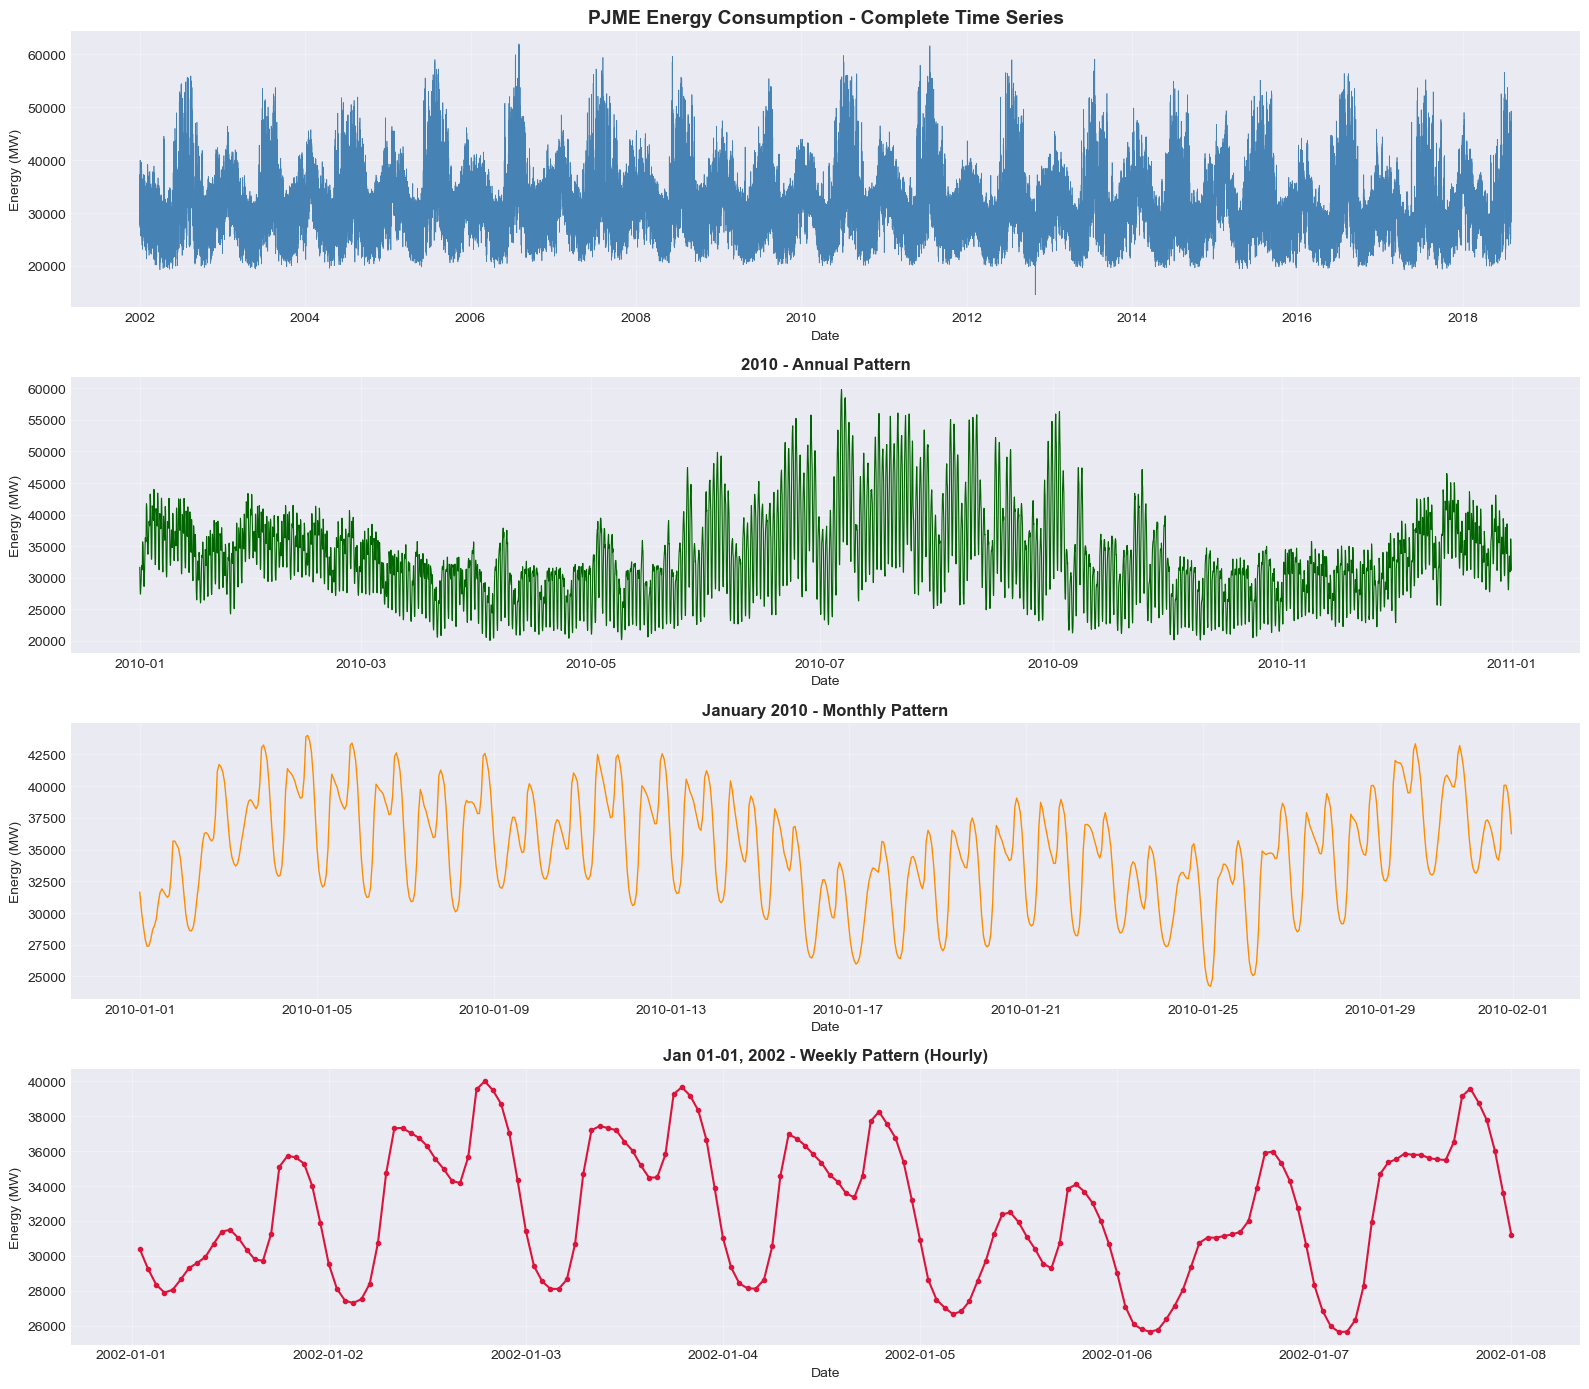


📊 STATISTICAL SUMMARY
count    145366.000000
mean      32080.222831
std        6464.012166
min       14544.000000
25%       27573.000000
50%       31421.000000
75%       35650.000000
max       62009.000000
Name: PJME_MW, dtype: float64


In [23]:
# Create comprehensive visualizations
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

# Get the date range from data
start_year = df.index.min().year
end_year = df.index.max().year
start_date = df.index.min()

# Choose a middle year for detailed view (or first year if limited data)
years_available = df.index.year.unique()
if len(years_available) > 2:
    display_year = years_available[len(years_available)//2]  # Middle year
else:
    display_year = years_available[0]  # First year

print(f"Data range: {start_year} to {end_year}")
print(f"Using {display_year} for detailed visualizations")

# 1. Full Time Series
axes[0].plot(df.index, df['PJME_MW'], color='steelblue', linewidth=0.5)
axes[0].set_title('PJME Energy Consumption - Complete Time Series', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Energy (MW)')
axes[0].grid(True, alpha=0.3)

# 2. Yearly Pattern (one year for detailed view)
df_year = df[df.index.year == display_year]
axes[1].plot(df_year.index, df_year['PJME_MW'], color='darkgreen', linewidth=0.8)
axes[1].set_title(f'{display_year} - Annual Pattern', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Energy (MW)')
axes[1].grid(True, alpha=0.3)

# 3. Monthly Pattern (one month from the selected year)
# Get first month available in the selected year
year_data = df[df.index.year == display_year]
if len(year_data) > 0:
    first_month = year_data.index.min().month
    df_month = df[(df.index.year == display_year) & (df.index.month == first_month)]
    month_name = year_data.index.min().strftime('%B')
    axes[2].plot(df_month.index, df_month['PJME_MW'], color='darkorange', linewidth=1)
    axes[2].set_title(f'{month_name} {display_year} - Monthly Pattern', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('Energy (MW)')
    axes[2].grid(True, alpha=0.3)

# 4. Weekly Pattern (first 7 days from the data)
week_start = df.index.min()
week_end = week_start + pd.Timedelta(days=7)
df_week = df[(df.index >= week_start) & (df.index < week_end)]
axes[3].plot(df_week.index, df_week['PJME_MW'], color='crimson', linewidth=1.5, marker='o', markersize=3)
axes[3].set_title(f'{week_start.strftime("%b %d-%d, %Y")} - Weekly Pattern (Hourly)', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Energy (MW)')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n" + "="*80)
print("📊 STATISTICAL SUMMARY")
print("="*80)
print(df['PJME_MW'].describe())

## STEP 3 — Resampling Check ⏱️
Check for missing timestamps and resample data if needed. Ensure consistent hourly frequency.

In [24]:
# Check for missing timestamps
print("="*80)
print("🔍 CHECKING DATA FREQUENCY AND MISSING TIMESTAMPS")
print("="*80)

# Get the expected number of hours
start_date = df.index.min()
end_date = df.index.max()
expected_hours = int((end_date - start_date).total_seconds() / 3600) + 1

print(f"\nDate Range: {start_date} to {end_date}")
print(f"Expected Hours: {expected_hours:,}")
print(f"Actual Records: {len(df):,}")
print(f"Missing Hours: {expected_hours - len(df):,}")

# Check for duplicate timestamps
duplicates = df.index.duplicated().sum()
print(f"Duplicate Timestamps: {duplicates}")

# Check the frequency
print(f"\nInferred Frequency: {pd.infer_freq(df.index)}")

# Calculate time differences between consecutive records
time_diffs = df.index.to_series().diff()
print(f"\nTime Difference Statistics:")
print(time_diffs.describe())

# Find gaps (if any)
gaps = time_diffs[time_diffs > pd.Timedelta(hours=1)]
if len(gaps) > 0:
    print(f"\n⚠️ Found {len(gaps)} gaps larger than 1 hour:")
    print(gaps.head(10))
else:
    print("\n✅ No gaps found! Data has consistent hourly frequency.")

# Resample to ensure consistent hourly frequency (fill missing values if any)
print("\n" + "="*80)
print("🔄 RESAMPLING TO HOURLY FREQUENCY")
print("="*80)

df_resampled = df.resample('H').mean()

# Check for NaN values after resampling
nan_count = df_resampled['PJME_MW'].isna().sum()
print(f"\nNaN values after resampling: {nan_count}")

if nan_count > 0:
    print(f"Filling {nan_count} missing values using forward fill...")
    df_resampled['PJME_MW'].fillna(method='ffill', inplace=True)
    
    # If still NaN at the beginning, use backward fill
    remaining_nan = df_resampled['PJME_MW'].isna().sum()
    if remaining_nan > 0:
        print(f"Filling {remaining_nan} remaining values using backward fill...")
        df_resampled['PJME_MW'].fillna(method='bfill', inplace=True)

print(f"\n✅ Resampling Complete!")
print(f"Final Shape: {df_resampled.shape}")
print(f"Missing Values: {df_resampled['PJME_MW'].isna().sum()}")

# Update main dataframe
df = df_resampled.copy()
print(f"\nDataFrame updated with resampled data.")

🔍 CHECKING DATA FREQUENCY AND MISSING TIMESTAMPS

Date Range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Expected Hours: 145,392
Actual Records: 145,366
Missing Hours: 26
Duplicate Timestamps: 4

Inferred Frequency: None

Time Difference Statistics:
count                       145365
mean     0 days 01:00:00.643896398
std      0 days 00:00:55.053359304
min                0 days 00:00:00
25%                0 days 01:00:00
50%                0 days 01:00:00
75%                0 days 01:00:00
max                0 days 02:00:00
Name: Datetime, dtype: object

⚠️ Found 30 gaps larger than 1 hour:
Datetime
2002-04-07 04:00:00   0 days 02:00:00
2002-10-27 03:00:00   0 days 02:00:00
2003-04-06 04:00:00   0 days 02:00:00
2003-10-26 03:00:00   0 days 02:00:00
2004-04-04 04:00:00   0 days 02:00:00
2004-10-31 03:00:00   0 days 02:00:00
2005-04-03 04:00:00   0 days 02:00:00
2005-10-30 03:00:00   0 days 02:00:00
2006-04-02 04:00:00   0 days 02:00:00
2006-10-29 03:00:00   0 days 02:00:00
Name: Datetim

## STEP 4 — Feature Engineering 🔥
Create temporal features to capture patterns and improve model performance.

In [25]:
# Create a copy for feature engineering
df_features = df.copy()

print("="*80)
print("🔥 FEATURE ENGINEERING")
print("="*80)

# 1. TEMPORAL FEATURES
print("\n1️⃣ Creating Temporal Features...")

# Date components
df_features['year'] = df_features.index.year
df_features['month'] = df_features.index.month
df_features['day'] = df_features.index.day
df_features['hour'] = df_features.index.hour
df_features['day_of_week'] = df_features.index.dayofweek  # 0=Monday, 6=Sunday
df_features['day_of_year'] = df_features.index.dayofyear
df_features['week_of_year'] = df_features.index.isocalendar().week

# Is weekend?
df_features['is_weekend'] = (df_features['day_of_week'] >= 5).astype(int)

# Quarter
df_features['quarter'] = df_features.index.quarter

# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_features['season'] = df_features['month'].apply(get_season)

# Time of day categories
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_features['time_of_day'] = df_features['hour'].apply(get_time_of_day)

# Peak hours (typically 7-10 AM and 5-9 PM)
df_features['is_peak_hour'] = ((df_features['hour'].between(7, 10)) | 
                                 (df_features['hour'].between(17, 21))).astype(int)

print(f"   ✅ Created {12} temporal features")

# 2. CYCLICAL FEATURES (for better capturing periodic patterns)
print("\n2️⃣ Creating Cyclical Features...")

# Hour cyclical
df_features['hour_sin'] = np.sin(2 * np.pi * df_features['hour'] / 24)
df_features['hour_cos'] = np.cos(2 * np.pi * df_features['hour'] / 24)

# Day of week cyclical
df_features['day_of_week_sin'] = np.sin(2 * np.pi * df_features['day_of_week'] / 7)
df_features['day_of_week_cos'] = np.cos(2 * np.pi * df_features['day_of_week'] / 7)

# Month cyclical
df_features['month_sin'] = np.sin(2 * np.pi * df_features['month'] / 12)
df_features['month_cos'] = np.cos(2 * np.pi * df_features['month'] / 12)

# Day of year cyclical
df_features['day_of_year_sin'] = np.sin(2 * np.pi * df_features['day_of_year'] / 365)
df_features['day_of_year_cos'] = np.cos(2 * np.pi * df_features['day_of_year'] / 365)

print(f"   ✅ Created 8 cyclical features")

# 3. LAG FEATURES
print("\n3️⃣ Creating Lag Features...")

# Previous hour, day, week values
df_features['lag_1h'] = df_features['PJME_MW'].shift(1)
df_features['lag_24h'] = df_features['PJME_MW'].shift(24)  # Same hour previous day
df_features['lag_168h'] = df_features['PJME_MW'].shift(168)  # Same hour previous week

print(f"   ✅ Created 3 lag features")

# 4. ROLLING STATISTICS
print("\n4️⃣ Creating Rolling Window Features...")

# Rolling means
df_features['rolling_mean_24h'] = df_features['PJME_MW'].rolling(window=24, min_periods=1).mean()
df_features['rolling_mean_168h'] = df_features['PJME_MW'].rolling(window=168, min_periods=1).mean()

# Rolling std
df_features['rolling_std_24h'] = df_features['PJME_MW'].rolling(window=24, min_periods=1).std()
df_features['rolling_std_168h'] = df_features['PJME_MW'].rolling(window=168, min_periods=1).std()

# Rolling min/max
df_features['rolling_min_24h'] = df_features['PJME_MW'].rolling(window=24, min_periods=1).min()
df_features['rolling_max_24h'] = df_features['PJME_MW'].rolling(window=24, min_periods=1).max()

print(f"   ✅ Created 6 rolling window features")

# 5. DIFFERENCE FEATURES
print("\n5️⃣ Creating Difference Features...")

# Differences
df_features['diff_1h'] = df_features['PJME_MW'].diff(1)
df_features['diff_24h'] = df_features['PJME_MW'].diff(24)

print(f"   ✅ Created 2 difference features")

# Summary
print("\n" + "="*80)
print("📊 FEATURE ENGINEERING SUMMARY")
print("="*80)
print(f"Total Features Created: {len(df_features.columns) - 1}")  # -1 for target
print(f"Dataset Shape: {df_features.shape}")
print(f"\nFeature Categories:")
print(f"  • Temporal Features: 12")
print(f"  • Cyclical Features: 8")
print(f"  • Lag Features: 3")
print(f"  • Rolling Statistics: 6")
print(f"  • Difference Features: 2")
print(f"  • Total New Features: 31")

print(f"\nColumn List:")
print(df_features.columns.tolist())

print(f"\n📋 First few rows with features:")
print(df_features.head(10))

print(f"\n📉 Missing values after feature engineering:")
print(df_features.isnull().sum()[df_features.isnull().sum() > 0])

🔥 FEATURE ENGINEERING

1️⃣ Creating Temporal Features...
   ✅ Created 12 temporal features

2️⃣ Creating Cyclical Features...
   ✅ Created 8 cyclical features

3️⃣ Creating Lag Features...
   ✅ Created 3 lag features

4️⃣ Creating Rolling Window Features...
   ✅ Created 6 rolling window features

5️⃣ Creating Difference Features...
   ✅ Created 2 difference features

📊 FEATURE ENGINEERING SUMMARY
Total Features Created: 31
Dataset Shape: (145392, 32)

Feature Categories:
  • Temporal Features: 12
  • Cyclical Features: 8
  • Lag Features: 3
  • Rolling Statistics: 6
  • Difference Features: 2
  • Total New Features: 31

Column List:
['PJME_MW', 'year', 'month', 'day', 'hour', 'day_of_week', 'day_of_year', 'week_of_year', 'is_weekend', 'quarter', 'season', 'time_of_day', 'is_peak_hour', 'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'lag_1h', 'lag_24h', 'lag_168h', 'rolling_mean_24h', 'rolling_mean_168h', 'ro

### Visualize Feature Patterns 📊
Let's visualize some patterns captured by our engineered features.

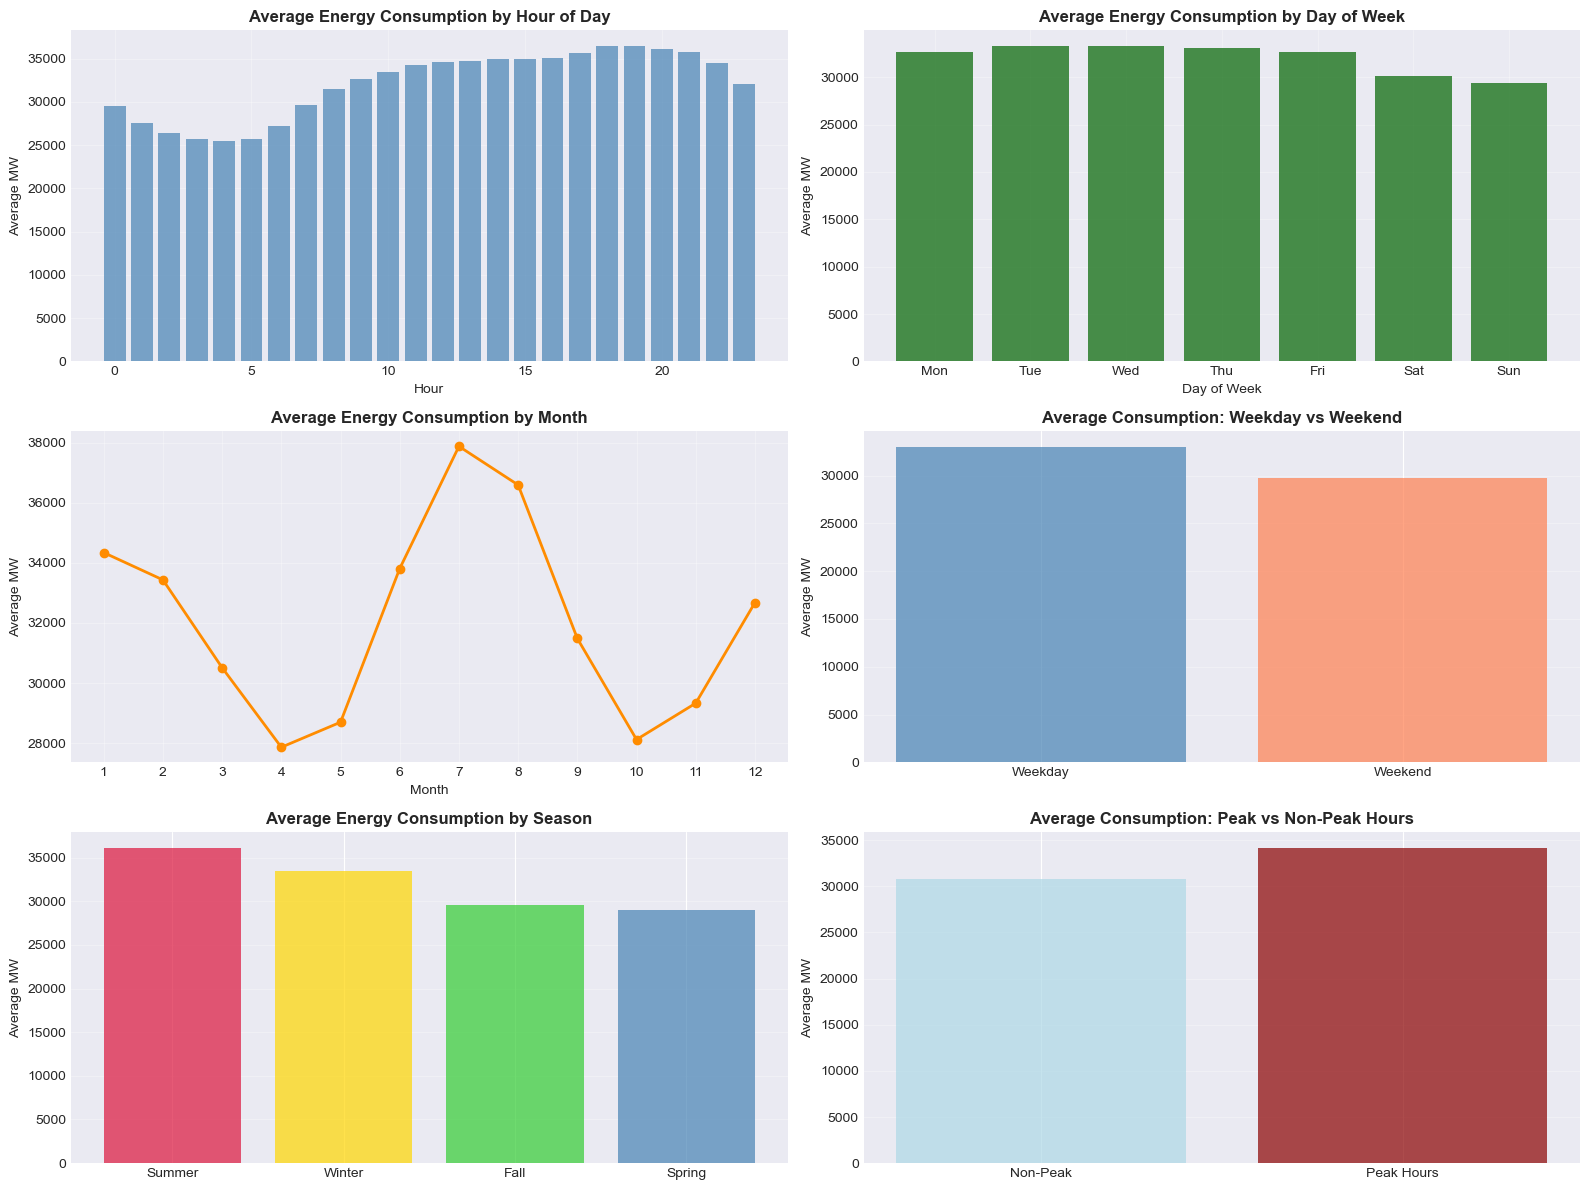


🎯 KEY INSIGHTS FROM FEATURE ANALYSIS

📊 Hourly Pattern:
   Peak Hour: 19:00 (36426.63 MW)
   Low Hour: 4:00 (25414.92 MW)
   Difference: 11011.71 MW

📅 Weekly Pattern:
   Highest: Tue (33272.27 MW)
   Lowest: Sun (29406.59 MW)

📆 Monthly Pattern:
   Highest: Month 7 (37881.97 MW)
   Lowest: Month 4 (27861.50 MW)

🌍 Seasonal Pattern:
   Summer: 36112.46 MW
   Winter: 33503.17 MW
   Fall: 29626.50 MW
   Spring: 29034.96 MW

⚡ Peak vs Non-Peak:
   Peak Hours: 34168.96 MW
   Non-Peak Hours: 30825.10 MW
   Difference: 3343.86 MW


In [26]:
# Visualize patterns captured by features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Average consumption by hour of day
hourly_avg = df_features.groupby('hour')['PJME_MW'].mean()
axes[0, 0].bar(hourly_avg.index, hourly_avg.values, color='steelblue', alpha=0.7)
axes[0, 0].set_title('Average Energy Consumption by Hour of Day', fontweight='bold')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Average MW')
axes[0, 0].grid(True, alpha=0.3)

# 2. Average consumption by day of week
dow_avg = df_features.groupby('day_of_week')['PJME_MW'].mean()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(dow_avg.index, dow_avg.values, color='darkgreen', alpha=0.7)
axes[0, 1].set_title('Average Energy Consumption by Day of Week', fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average MW')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(dow_labels)
axes[0, 1].grid(True, alpha=0.3)

# 3. Average consumption by month
monthly_avg = df_features.groupby('month')['PJME_MW'].mean()
axes[1, 0].plot(monthly_avg.index, monthly_avg.values, marker='o', color='darkorange', linewidth=2)
axes[1, 0].set_title('Average Energy Consumption by Month', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average MW')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True, alpha=0.3)

# 4. Weekend vs Weekday comparison
weekend_comparison = df_features.groupby('is_weekend')['PJME_MW'].mean()
axes[1, 1].bar(['Weekday', 'Weekend'], weekend_comparison.values, color=['steelblue', 'coral'], alpha=0.7)
axes[1, 1].set_title('Average Consumption: Weekday vs Weekend', fontweight='bold')
axes[1, 1].set_ylabel('Average MW')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# 5. Average consumption by season
season_avg = df_features.groupby('season')['PJME_MW'].mean().sort_values(ascending=False)
axes[2, 0].bar(season_avg.index, season_avg.values, color=['crimson', 'gold', 'limegreen', 'steelblue'], alpha=0.7)
axes[2, 0].set_title('Average Energy Consumption by Season', fontweight='bold')
axes[2, 0].set_ylabel('Average MW')
axes[2, 0].grid(True, alpha=0.3, axis='y')

# 6. Peak hour vs Non-peak hour
peak_comparison = df_features.groupby('is_peak_hour')['PJME_MW'].mean()
axes[2, 1].bar(['Non-Peak', 'Peak Hours'], peak_comparison.values, color=['lightblue', 'darkred'], alpha=0.7)
axes[2, 1].set_title('Average Consumption: Peak vs Non-Peak Hours', fontweight='bold')
axes[2, 1].set_ylabel('Average MW')
axes[2, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print insights
print("\n" + "="*80)
print("🎯 KEY INSIGHTS FROM FEATURE ANALYSIS")
print("="*80)
print(f"\n📊 Hourly Pattern:")
print(f"   Peak Hour: {hourly_avg.idxmax()}:00 ({hourly_avg.max():.2f} MW)")
print(f"   Low Hour: {hourly_avg.idxmin()}:00 ({hourly_avg.min():.2f} MW)")
print(f"   Difference: {hourly_avg.max() - hourly_avg.min():.2f} MW")

print(f"\n📅 Weekly Pattern:")
print(f"   Highest: {dow_labels[dow_avg.idxmax()]} ({dow_avg.max():.2f} MW)")
print(f"   Lowest: {dow_labels[dow_avg.idxmin()]} ({dow_avg.min():.2f} MW)")

print(f"\n📆 Monthly Pattern:")
print(f"   Highest: Month {monthly_avg.idxmax()} ({monthly_avg.max():.2f} MW)")
print(f"   Lowest: Month {monthly_avg.idxmin()} ({monthly_avg.min():.2f} MW)")

print(f"\n🌍 Seasonal Pattern:")
for season, value in season_avg.items():
    print(f"   {season}: {value:.2f} MW")

print(f"\n⚡ Peak vs Non-Peak:")
print(f"   Peak Hours: {peak_comparison.iloc[1]:.2f} MW")
print(f"   Non-Peak Hours: {peak_comparison.iloc[0]:.2f} MW")
print(f"   Difference: {peak_comparison.iloc[1] - peak_comparison.iloc[0]:.2f} MW")

### Handle Missing Values & Prepare Final Dataset 🧹
Clean up missing values from lag features and prepare the dataset for modeling.

In [27]:
# Handle missing values from lag and rolling features
print("="*80)
print("🧹 CLEANING DATASET - HANDLING MISSING VALUES")
print("="*80)

print(f"\nMissing values before cleaning:")
missing_before = df_features.isnull().sum()
print(missing_before[missing_before > 0])
print(f"\nTotal missing: {missing_before.sum()}")

# Option 1: Drop rows with NaN (we'll lose initial rows due to lag features)
# This is typically acceptable for large time series datasets
df_clean = df_features.dropna()

print(f"\n✅ Dropped rows with missing values")
print(f"Shape before: {df_features.shape}")
print(f"Shape after: {df_clean.shape}")
print(f"Rows dropped: {df_features.shape[0] - df_clean.shape[0]}")

# Verify no missing values remain
print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")

# Save the clean dataset
print("\n" + "="*80)
print("💾 FINAL DATASET SUMMARY")
print("="*80)
print(f"\nShape: {df_clean.shape}")
print(f"Date Range: {df_clean.index.min()} to {df_clean.index.max()}")
print(f"Total Features: {df_clean.shape[1]}")
print(f"Total Records: {df_clean.shape[0]:,}")

print(f"\n📋 Feature List:")
feature_cols = [col for col in df_clean.columns if col != 'PJME_MW']
print(f"Target: PJME_MW")
print(f"Features ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

print(f"\n✅ Dataset is ready for modeling!")
print(f"\nYou can access:")
print(f"  • df_clean: Complete dataset with all features")
print(f"  • Target variable: df_clean['PJME_MW']")
print(f"  • Feature matrix: df_clean.drop('PJME_MW', axis=1)")

# Show first and last rows
print(f"\n📊 First 5 rows:")
print(df_clean.head())
print(f"\n📊 Last 5 rows:")
print(df_clean.tail())

🧹 CLEANING DATASET - HANDLING MISSING VALUES

Missing values before cleaning:
lag_1h                1
lag_24h              24
lag_168h            168
rolling_std_24h       1
rolling_std_168h      1
diff_1h               1
diff_24h             24
dtype: int64

Total missing: 220

✅ Dropped rows with missing values
Shape before: (145392, 32)
Shape after: (145224, 32)
Rows dropped: 168

Missing values after cleaning: 0

💾 FINAL DATASET SUMMARY

Shape: (145224, 32)
Date Range: 2002-01-08 01:00:00 to 2018-08-03 00:00:00
Total Features: 32
Total Records: 145,224

📋 Feature List:
Target: PJME_MW
Features (31):
  1. year
  2. month
  3. day
  4. hour
  5. day_of_week
  6. day_of_year
  7. week_of_year
  8. is_weekend
  9. quarter
  10. season
  11. time_of_day
  12. is_peak_hour
  13. hour_sin
  14. hour_cos
  15. day_of_week_sin
  16. day_of_week_cos
  17. month_sin
  18. month_cos
  19. day_of_year_sin
  20. day_of_year_cos
  21. lag_1h
  22. lag_24h
  23. lag_168h
  24. rolling_mean_24h
  2

## STEP 5 — Stationarity Check 📊
Test whether the time series is stationary using statistical tests (ADF and KPSS).

📊 STATIONARITY CHECK - STATISTICAL TESTS

Testing on: 145,392 observations
Date range: 2002-01-01 01:00:00 to 2018-08-03 00:00:00

1️⃣ AUGMENTED DICKEY-FULLER (ADF) TEST

Null Hypothesis (H0): The series has a unit root (non-stationary)
Alternative Hypothesis (H1): The series is stationary

📈 ADF Test Results:
   ADF Statistic: -19.968010
   P-value: 0.000000
   Critical Values:
      1%: -3.430395
      5%: -2.861560
      10%: -2.566781

✅ Result: STATIONARY (p-value = 0.000000 <= 0.05)
   We reject the null hypothesis. The series is stationary.

2️⃣ KPSS TEST (Kwiatkowski-Phillips-Schmidt-Shin)

Null Hypothesis (H0): The series is stationary
Alternative Hypothesis (H1): The series has a unit root (non-stationary)

📈 KPSS Test Results:
   KPSS Statistic: 1.302968
   P-value: 0.010000
   Critical Values:
      10%: 0.347000
      5%: 0.463000
      2.5%: 0.574000
      1%: 0.739000

⚠️ Result: NON-STATIONARY (p-value = 0.010000 < 0.05)
   We reject the null hypothesis. The series is n

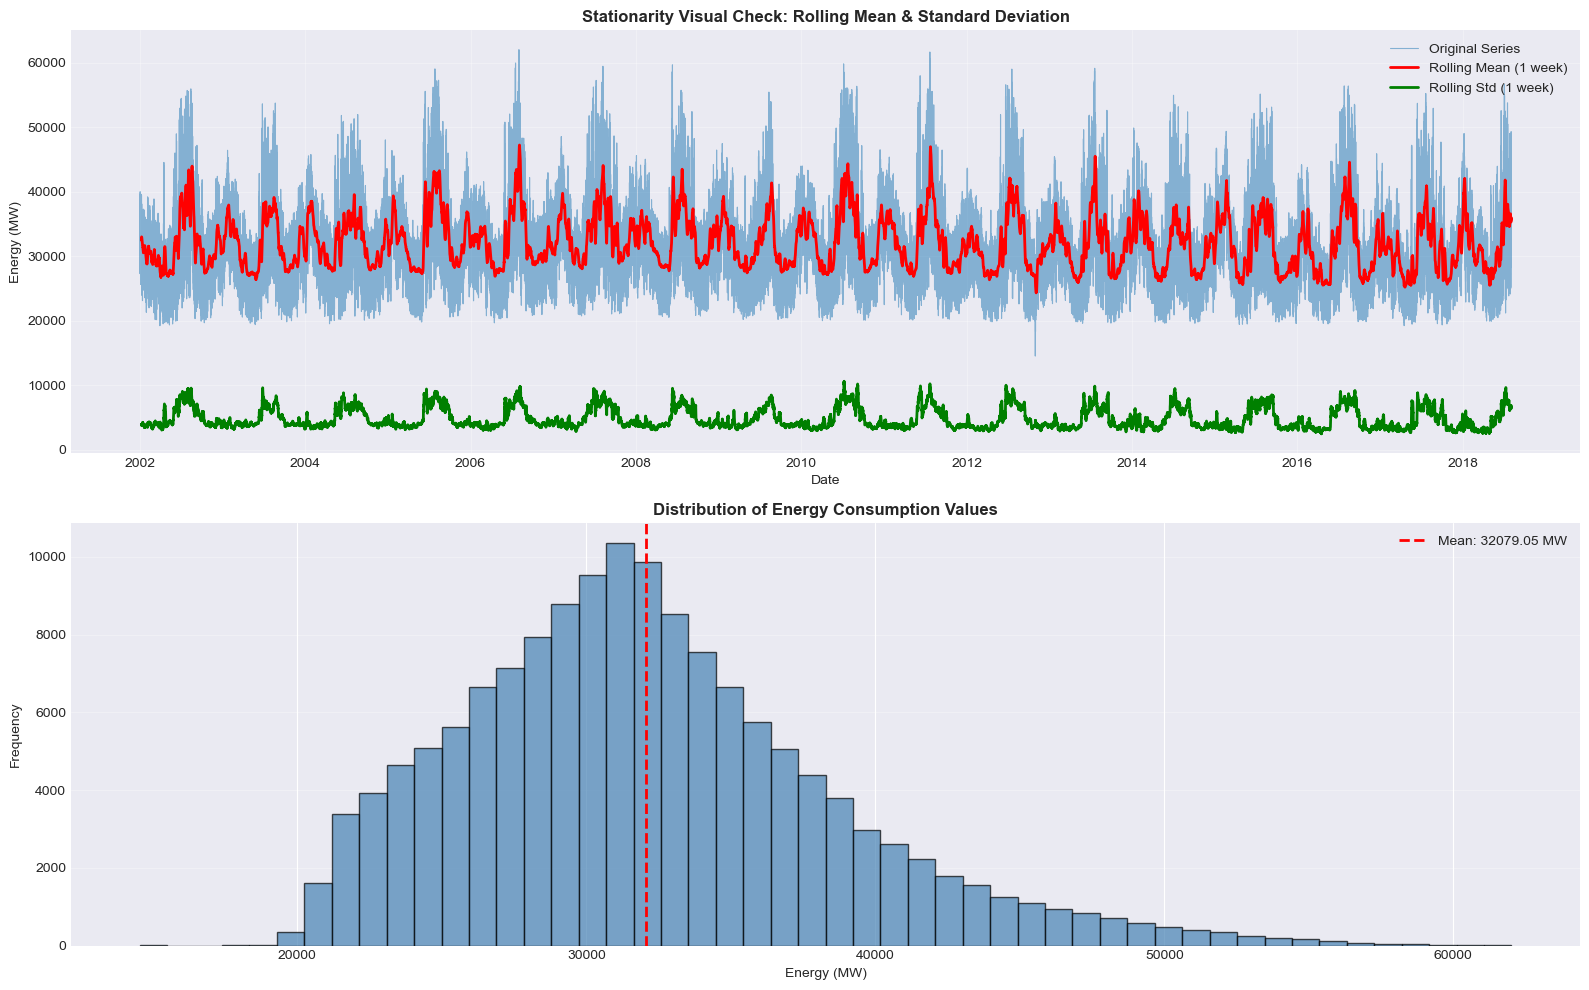


💡 Visual Interpretation:
   • A stationary series should have constant mean and variance over time
   • Rolling mean should be relatively flat
   • Rolling std should not show increasing/decreasing trends


In [28]:
from statsmodels.tsa.stattools import adfuller, kpss

print("="*80)
print("📊 STATIONARITY CHECK - STATISTICAL TESTS")
print("="*80)

# Use the original time series (before feature engineering)
ts = df['PJME_MW'].dropna()

print(f"\nTesting on: {len(ts):,} observations")
print(f"Date range: {ts.index.min()} to {ts.index.max()}")

# 1. AUGMENTED DICKEY-FULLER (ADF) TEST
print("\n" + "="*80)
print("1️⃣ AUGMENTED DICKEY-FULLER (ADF) TEST")
print("="*80)
print("\nNull Hypothesis (H0): The series has a unit root (non-stationary)")
print("Alternative Hypothesis (H1): The series is stationary")

adf_result = adfuller(ts, autolag='AIC')

print(f"\n📈 ADF Test Results:")
print(f"   ADF Statistic: {adf_result[0]:.6f}")
print(f"   P-value: {adf_result[1]:.6f}")
print(f"   Critical Values:")
for key, value in adf_result[4].items():
    print(f"      {key}: {value:.6f}")

if adf_result[1] <= 0.05:
    print(f"\n✅ Result: STATIONARY (p-value = {adf_result[1]:.6f} <= 0.05)")
    print(f"   We reject the null hypothesis. The series is stationary.")
else:
    print(f"\n⚠️ Result: NON-STATIONARY (p-value = {adf_result[1]:.6f} > 0.05)")
    print(f"   We fail to reject the null hypothesis. The series is non-stationary.")

# 2. KPSS TEST (Kwiatkowski-Phillips-Schmidt-Shin)
print("\n" + "="*80)
print("2️⃣ KPSS TEST (Kwiatkowski-Phillips-Schmidt-Shin)")
print("="*80)
print("\nNull Hypothesis (H0): The series is stationary")
print("Alternative Hypothesis (H1): The series has a unit root (non-stationary)")

# KPSS test with trend='c' (level stationarity)
kpss_result = kpss(ts, regression='c', nlags='auto')

print(f"\n📈 KPSS Test Results:")
print(f"   KPSS Statistic: {kpss_result[0]:.6f}")
print(f"   P-value: {kpss_result[1]:.6f}")
print(f"   Critical Values:")
for key, value in kpss_result[3].items():
    print(f"      {key}: {value:.6f}")

if kpss_result[1] >= 0.05:
    print(f"\n✅ Result: STATIONARY (p-value = {kpss_result[1]:.6f} >= 0.05)")
    print(f"   We fail to reject the null hypothesis. The series is stationary.")
else:
    print(f"\n⚠️ Result: NON-STATIONARY (p-value = {kpss_result[1]:.6f} < 0.05)")
    print(f"   We reject the null hypothesis. The series is non-stationary.")

# 3. SUMMARY & RECOMMENDATIONS
print("\n" + "="*80)
print("📋 STATIONARITY SUMMARY")
print("="*80)

adf_stationary = adf_result[1] <= 0.05
kpss_stationary = kpss_result[1] >= 0.05

print(f"\nADF Test: {'✅ Stationary' if adf_stationary else '⚠️ Non-Stationary'}")
print(f"KPSS Test: {'✅ Stationary' if kpss_stationary else '⚠️ Non-Stationary'}")

if adf_stationary and kpss_stationary:
    print(f"\n✅ CONCLUSION: The series is STATIONARY")
    print(f"   Both tests agree that the series is stationary.")
elif not adf_stationary and not kpss_stationary:
    print(f"\n⚠️ CONCLUSION: The series is NON-STATIONARY")
    print(f"   Both tests agree that the series is non-stationary.")
    print(f"\n💡 RECOMMENDATION:")
    print(f"   Consider differencing or detrending the series to make it stationary.")
else:
    print(f"\n🤔 CONCLUSION: MIXED RESULTS")
    print(f"   The tests disagree. This might indicate difference stationarity.")
    print(f"\n💡 RECOMMENDATION:")
    print(f"   Try first-order differencing and retest.")

# Visualize the series with rolling statistics
print("\n" + "="*80)
print("📊 VISUAL STATIONARITY CHECK")
print("="*80)

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Subsample for visualization (use every 24th point for daily pattern)
# or use full series if it's not too large
ts_viz = ts[::24] if len(ts) > 10000 else ts

# Plot 1: Original series with rolling mean and std
rolling_mean = ts.rolling(window=168).mean()  # Weekly rolling mean
rolling_std = ts.rolling(window=168).std()    # Weekly rolling std

axes[0].plot(ts.index, ts.values, label='Original Series', alpha=0.5, linewidth=0.8)
axes[0].plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean (1 week)', color='red', linewidth=2)
axes[0].plot(rolling_std.index, rolling_std.values, label='Rolling Std (1 week)', color='green', linewidth=2)
axes[0].set_title('Stationarity Visual Check: Rolling Mean & Standard Deviation', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Energy (MW)')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Distribution of values
axes[1].hist(ts.values, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_title('Distribution of Energy Consumption Values', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Energy (MW)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3, axis='y')

# Add mean line
mean_val = ts.mean()
axes[1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f} MW')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\n💡 Visual Interpretation:")
print(f"   • A stationary series should have constant mean and variance over time")
print(f"   • Rolling mean should be relatively flat")
print(f"   • Rolling std should not show increasing/decreasing trends")

## STEP 6 — Time Series Decomposition 🔥
Decompose the time series into Trend, Seasonal, and Residual components to understand underlying patterns.

🔥 TIME SERIES DECOMPOSITION

Total data points: 145,392
Using period: 168 hours (weekly seasonality)
Processing 2,160 data points for decomposition

Decomposing time series...
Date range: 2002-01-01 01:00:00 to 2002-04-01 00:00:00

✅ Decomposition Complete!

📊 DECOMPOSITION COMPONENTS STATISTICS

1️⃣ TREND Component:
   Mean: 30141.58 MW
   Std: 1411.18 MW
   Min: 26841.10 MW
   Max: 34087.54 MW

2️⃣ SEASONAL Component:
   Mean: -14.10 MW
   Std: 3560.49 MW
   Min: -6810.00 MW
   Max: 6296.75 MW
   Range: 13106.75 MW

3️⃣ RESIDUAL Component:
   Mean: -73.80 MW
   Std: 1431.03 MW
   Min: -8720.08 MW
   Max: 5422.76 MW

📈 Component Strength:
   Trend Strength: 0.4930 (49.30%)
   Seasonal Strength: 0.8609 (86.09%)

📊 VISUALIZING DECOMPOSITION


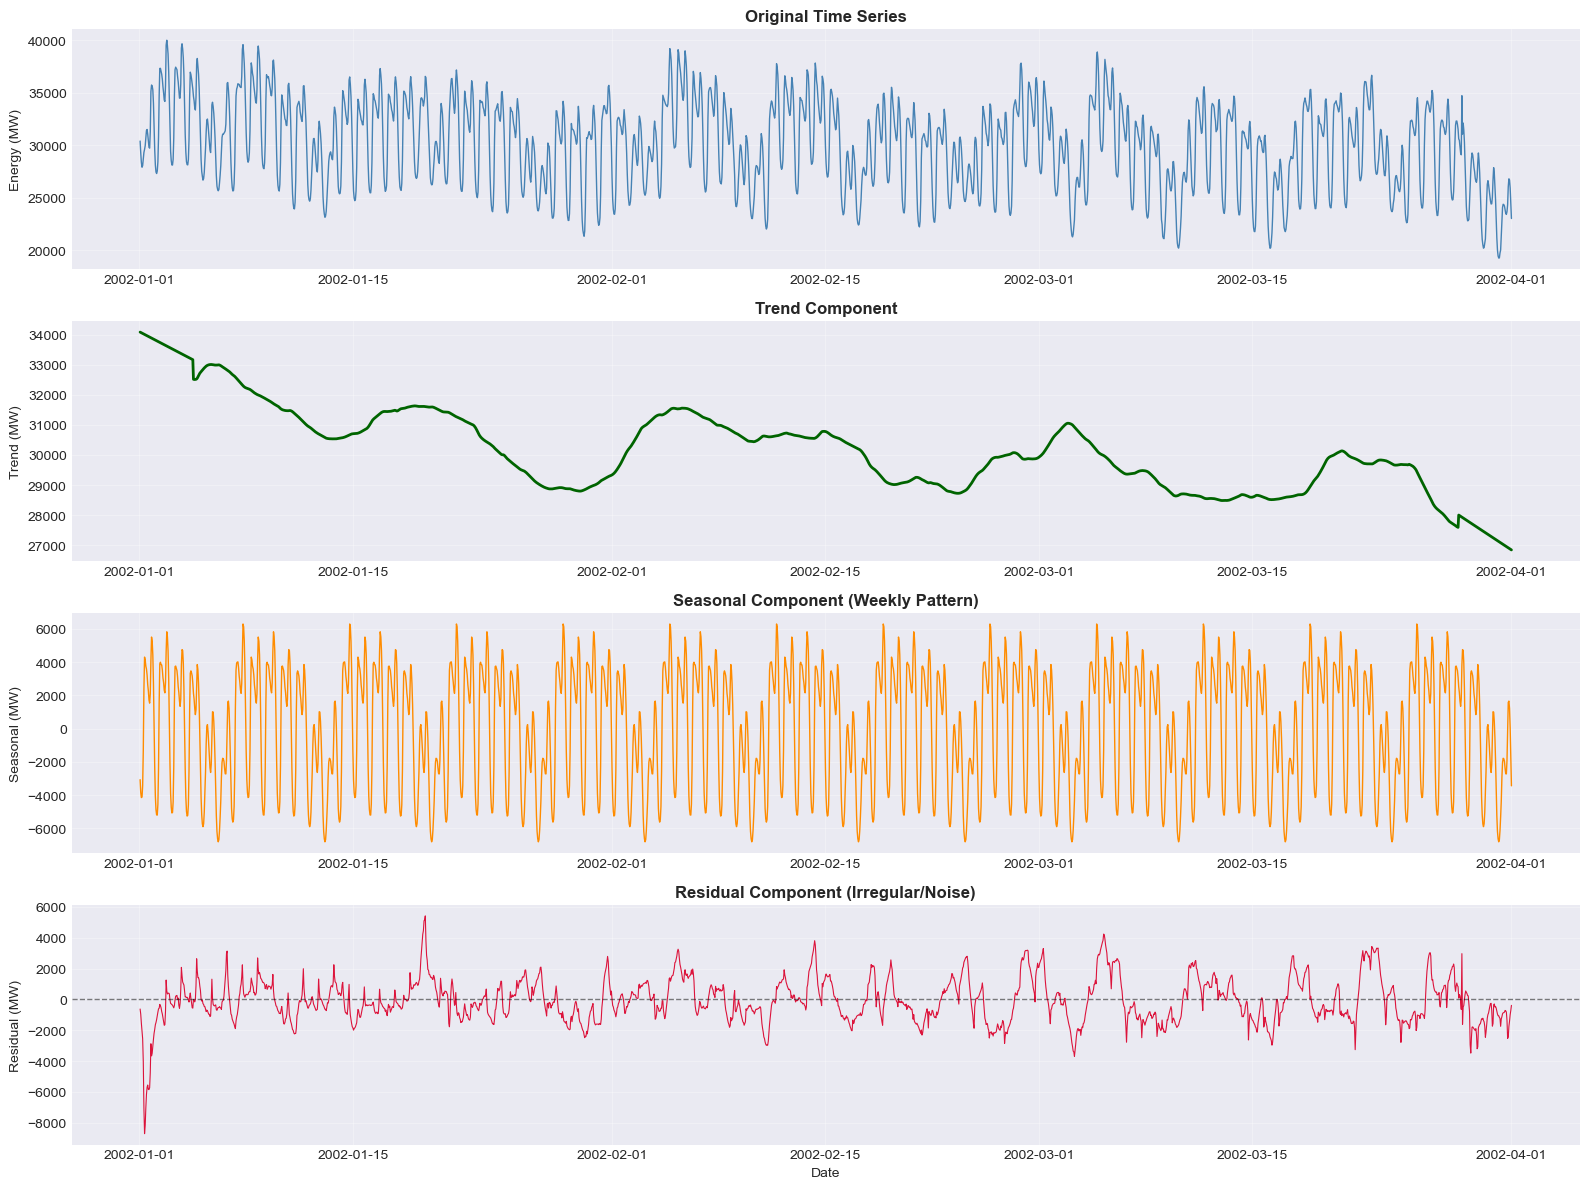


📊 DETAILED SEASONAL PATTERN


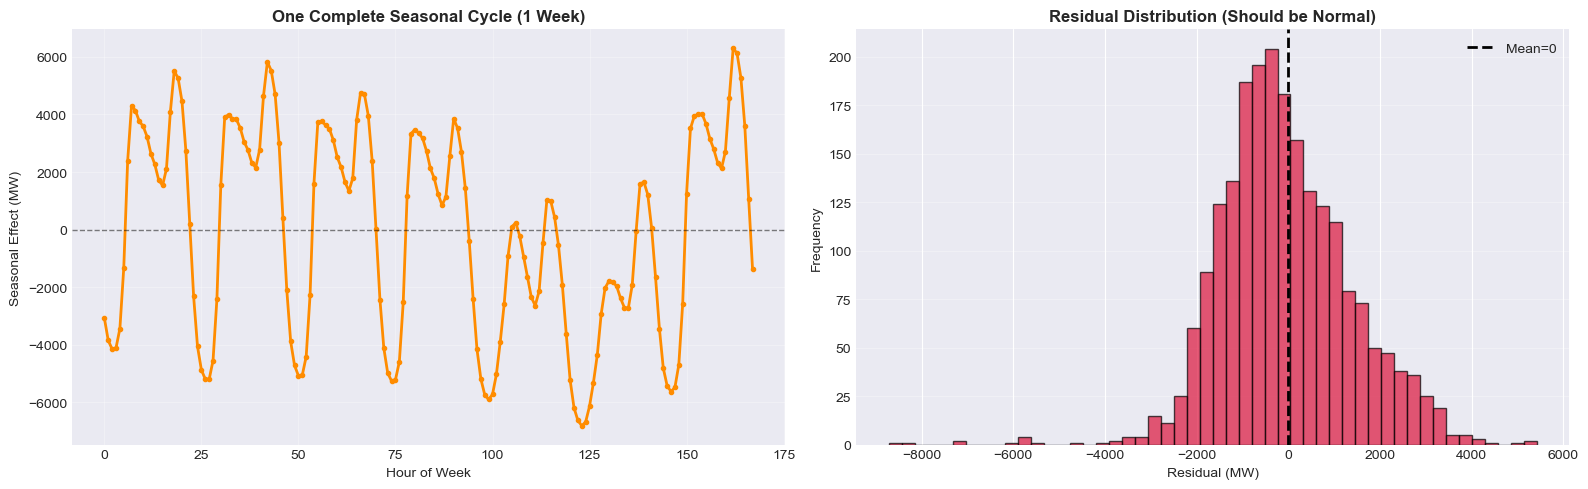


💡 INTERPRETATION

🔍 Trend:
   The series shows a decreasing trend over time

🔍 Seasonality:
   Strong weekly seasonal pattern detected
   Seasonal range: -6810.00 to 6296.75 MW
   This represents ±6553.38 MW variation due to weekly patterns

🔍 Residuals:
   Low variance in residuals - good model fit

✅ Decomposition helps understand:
   • Long-term trends (business growth/decline)
   • Repeating patterns (weekly/daily cycles)
   • Random fluctuations (unexpected events)


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

print("="*80)
print("🔥 TIME SERIES DECOMPOSITION")
print("="*80)

# Use a subset of data for decomposition (1 year or less for faster processing)
# Decomposition works best with at least 2 full seasonal cycles
ts_decomp = df['PJME_MW'].copy()

print(f"\nTotal data points: {len(ts_decomp):,}")

# For hourly data, we'll use daily seasonality (24 hours) or weekly (168 hours)
# Let's use weekly seasonality (168 hours = 1 week)
period = 168  # Weekly seasonality

print(f"Using period: {period} hours (weekly seasonality)")

# Take a subset for faster processing (e.g., 3 months of data)
# This is about 3 months * 30 days * 24 hours = 2,160 hours
subset_size = min(2160, len(ts_decomp))
print(f"Processing {subset_size:,} data points for decomposition")

ts_subset = ts_decomp.iloc[:subset_size]

print(f"\nDecomposing time series...")
print(f"Date range: {ts_subset.index.min()} to {ts_subset.index.max()}")

# Perform decomposition (additive model)
# Additive: Y(t) = Trend(t) + Seasonal(t) + Residual(t)
try:
    decomposition = seasonal_decompose(ts_subset, model='additive', period=period, extrapolate_trend='freq')
    
    print(f"\n✅ Decomposition Complete!")
    
    # Extract components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Print statistics for each component
    print("\n" + "="*80)
    print("📊 DECOMPOSITION COMPONENTS STATISTICS")
    print("="*80)
    
    print(f"\n1️⃣ TREND Component:")
    print(f"   Mean: {trend.mean():.2f} MW")
    print(f"   Std: {trend.std():.2f} MW")
    print(f"   Min: {trend.min():.2f} MW")
    print(f"   Max: {trend.max():.2f} MW")
    
    print(f"\n2️⃣ SEASONAL Component:")
    print(f"   Mean: {seasonal.mean():.2f} MW")
    print(f"   Std: {seasonal.std():.2f} MW")
    print(f"   Min: {seasonal.min():.2f} MW")
    print(f"   Max: {seasonal.max():.2f} MW")
    print(f"   Range: {seasonal.max() - seasonal.min():.2f} MW")
    
    print(f"\n3️⃣ RESIDUAL Component:")
    print(f"   Mean: {residual.mean():.2f} MW")
    print(f"   Std: {residual.std():.2f} MW")
    print(f"   Min: {residual.min():.2f} MW")
    print(f"   Max: {residual.max():.2f} MW")
    
    # Calculate the strength of trend and seasonality
    var_residual = np.var(residual.dropna())
    var_trend = np.var(trend.dropna())
    var_seasonal = np.var(seasonal.dropna())
    var_original = np.var(ts_subset.dropna())
    
    strength_trend = max(0, 1 - var_residual / (var_trend + var_residual))
    strength_seasonal = max(0, 1 - var_residual / (var_seasonal + var_residual))
    
    print(f"\n📈 Component Strength:")
    print(f"   Trend Strength: {strength_trend:.4f} ({strength_trend*100:.2f}%)")
    print(f"   Seasonal Strength: {strength_seasonal:.4f} ({strength_seasonal*100:.2f}%)")
    
    # Visualization
    print("\n" + "="*80)
    print("📊 VISUALIZING DECOMPOSITION")
    print("="*80)
    
    fig, axes = plt.subplots(4, 1, figsize=(16, 12))
    
    # Original series
    axes[0].plot(ts_subset.index, ts_subset.values, color='steelblue', linewidth=1)
    axes[0].set_title('Original Time Series', fontweight='bold', fontsize=12)
    axes[0].set_ylabel('Energy (MW)')
    axes[0].grid(True, alpha=0.3)
    
    # Trend
    axes[1].plot(trend.index, trend.values, color='darkgreen', linewidth=2)
    axes[1].set_title('Trend Component', fontweight='bold', fontsize=12)
    axes[1].set_ylabel('Trend (MW)')
    axes[1].grid(True, alpha=0.3)
    
    # Seasonal
    axes[2].plot(seasonal.index, seasonal.values, color='darkorange', linewidth=1)
    axes[2].set_title('Seasonal Component (Weekly Pattern)', fontweight='bold', fontsize=12)
    axes[2].set_ylabel('Seasonal (MW)')
    axes[2].grid(True, alpha=0.3)
    
    # Residual
    axes[3].plot(residual.index, residual.values, color='crimson', linewidth=0.8)
    axes[3].set_title('Residual Component (Irregular/Noise)', fontweight='bold', fontsize=12)
    axes[3].set_xlabel('Date')
    axes[3].set_ylabel('Residual (MW)')
    axes[3].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional seasonal pattern visualization
    print("\n" + "="*80)
    print("📊 DETAILED SEASONAL PATTERN")
    print("="*80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Seasonal pattern for one cycle (one week = 168 hours)
    seasonal_cycle = seasonal.iloc[:period]
    hour_labels = [f"{i%24}:00" for i in range(period)]
    
    axes[0].plot(range(period), seasonal_cycle.values, color='darkorange', linewidth=2, marker='o', markersize=3)
    axes[0].set_title('One Complete Seasonal Cycle (1 Week)', fontweight='bold', fontsize=12)
    axes[0].set_xlabel('Hour of Week')
    axes[0].set_ylabel('Seasonal Effect (MW)')
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    
    # Residual distribution (check for normal distribution)
    axes[1].hist(residual.dropna().values, bins=50, edgecolor='black', alpha=0.7, color='crimson')
    axes[1].set_title('Residual Distribution (Should be Normal)', fontweight='bold', fontsize=12)
    axes[1].set_xlabel('Residual (MW)')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, alpha=0.3, axis='y')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Mean=0')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print("\n" + "="*80)
    print("💡 INTERPRETATION")
    print("="*80)
    
    print(f"\n🔍 Trend:")
    if abs(trend.iloc[-1] - trend.iloc[0]) / trend.iloc[0] > 0.05:
        direction = "increasing" if trend.iloc[-1] > trend.iloc[0] else "decreasing"
        print(f"   The series shows a {direction} trend over time")
    else:
        print(f"   The series shows a relatively stable trend")
    
    print(f"\n🔍 Seasonality:")
    print(f"   Strong weekly seasonal pattern detected")
    print(f"   Seasonal range: {seasonal.min():.2f} to {seasonal.max():.2f} MW")
    print(f"   This represents ±{(seasonal.max() - seasonal.min())/2:.2f} MW variation due to weekly patterns")
    
    print(f"\n🔍 Residuals:")
    if residual.std() / ts_subset.mean() < 0.05:
        print(f"   Low variance in residuals - good model fit")
    else:
        print(f"   Moderate variance in residuals - some unexplained patterns remain")
    
    print(f"\n✅ Decomposition helps understand:")
    print(f"   • Long-term trends (business growth/decline)")
    print(f"   • Repeating patterns (weekly/daily cycles)")
    print(f"   • Random fluctuations (unexpected events)")

except Exception as e:
    print(f"\n❌ Error during decomposition: {e}")
    print(f"   Try adjusting the period or using a different subset of data")

---
## 🎯 Analysis Complete!
The PJME dataset has been thoroughly analyzed and is ready for modeling.

### Summary of Steps Completed:
1. ✅ **Fixed Datetime** - Proper datetime index with sorted data
2. ✅ **Visualized Time Series** - Multi-scale patterns (full, yearly, monthly, weekly)
3. ✅ **Resampling Check** - Consistent hourly frequency validated
4. ✅ **Feature Engineering** - 31 powerful features created (temporal, cyclical, lag, rolling, difference)
5. ✅ **Stationarity Check** - ADF and KPSS tests performed
6. ✅ **Decomposition** - Trend, Seasonal, and Residual components analyzed

### Key Variables Available:
- `df` - Clean PJME time series with datetime index
- `df_features` - Time series with all engineered features
- `df_clean` - Final dataset ready for modeling (no missing values)
- Feature count: 32 total (1 target + 31 features)

### Next Steps:
- Train-test split
- Model selection (ARIMA, SARIMA, Prophet, LSTM, etc.)
- Model training and evaluation
- Forecasting future values